# Machine Learning with H2O - Tutorial 4a: Classification Models (Basics)

<hr>

**Objective**:

- This tutorial explains how to build classification models with four different H2O algorithms.

<hr>

**Titanic Dataset:**

- Source: https://www.kaggle.com/c/titanic/data

<hr>
    
**Algorithms**:

1. GLM
2. DRF
3. GBM
4. DNN


<hr>

**Full Technical Reference:**

- http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html

<br>


In [1]:
# Start and connect to a local H2O cluster
import h2o
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_131"; OpenJDK Runtime Environment (build 1.8.0_131-8u131-b11-0ubuntu1.16.04.2-b11); OpenJDK 64-Bit Server VM (build 25.131-b11, mixed mode)
  Starting server from /home/joe/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpq3s4s6qw
  JVM stdout: /tmp/tmpq3s4s6qw/h2o_joe_started_from_python.out
  JVM stderr: /tmp/tmpq3s4s6qw/h2o_joe_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster version:,3.10.5.2
H2O cluster version age:,10 days
H2O cluster name:,H2O_from_python_joe_8n99xp
H2O cluster total nodes:,1
H2O cluster free memory:,5.210 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


<br>

In [2]:
# Import Titanic data (local CSV)
titanic = h2o.import_file("kaggle_titanic.csv")
titanic.head(5)

Parse progress: |█████████████████████████████████████████████████████████| 100%


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,nan,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,nan,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,nan,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S


In [3]:
# Convert 'Survived' and 'Pclass' to categorical values
titanic['Survived'] = titanic['Survived'].asfactor()
titanic['Pclass'] = titanic['Pclass'].asfactor()

In [4]:
titanic['Survived'].table()

Survived,Count
0,549
1,342


In [5]:
titanic['Pclass'].table()

Pclass,Count
1,216
2,184
3,491


In [6]:
titanic['Sex'].table()

Sex,Count
female,314
male,577


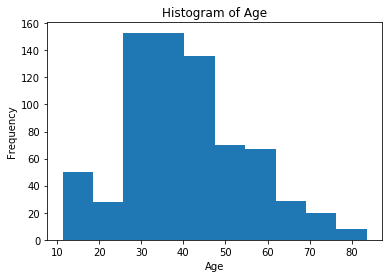

In [7]:
titanic['Age'].hist()

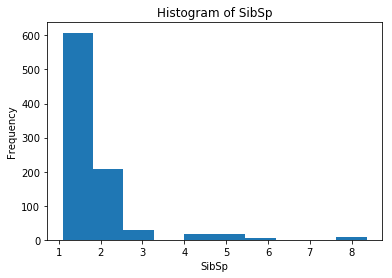

In [8]:
titanic['SibSp'].hist()

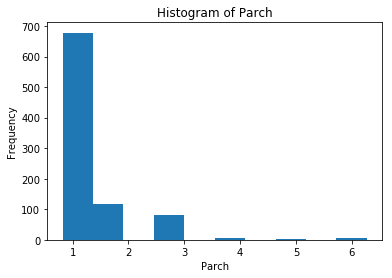

In [9]:
titanic['Parch'].hist()

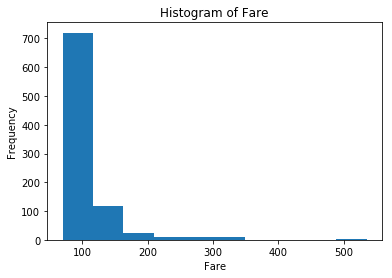

In [10]:
titanic['Fare'].hist()

In [11]:
titanic['Embarked'].table()

Embarked,Count
C,168
Q,77
S,644


In [12]:
# Define features (or predictors) manually
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [13]:
# Split the H2O data frame into training/test sets
# so we can evaluate out-of-bag performance
titanic_split = titanic.split_frame(ratios = [0.8], seed = 1234)

titanic_train = titanic_split[0] # using 80% for training
titanic_test = titanic_split[1]  # using the rest 20% for out-of-bag evaluation

In [14]:
titanic_train.shape

(712, 12)

In [15]:
titanic_test.shape

(179, 12)

<br>

## Generalized Linear Model

In [16]:
# Build a Generalized Linear Model (GLM) with default settings

# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Set up GLM for binary classification
glm_default = H2OGeneralizedLinearEstimator(family = 'binomial', model_id = 'glm_default')

# Use .train() to build the model
glm_default.train(x = features, 
                  y = 'Survived', 
                  training_frame = titanic_train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [17]:
# Check the model performance on training dataset
glm_default

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_default


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1382288206898215
RMSE: 0.37179136715343664
LogLoss: 0.4365971276608109
Null degrees of freedom: 711
Residual degrees of freedom: 700
Null deviance: 939.9987544934203
Residual deviance: 621.7143097889948
AIC: 645.7143097889948
AUC: 0.8541387024608501
Gini: 0.7082774049217002
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.326408717958219: 


,0,1,Error,Rate
0,354.0,93.0,0.2081,(93.0/447.0)
1,54.0,211.0,0.2038,(54.0/265.0)
Total,408.0,304.0,0.2065,(147.0/712.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3264087,0.7416520,231.0
max f2,0.2662247,0.7879656,251.0
max f0point5,0.6655020,0.8023379,122.0
max accuracy,0.6655020,0.8146067,122.0
max precision,0.9710368,1.0,0.0
max recall,0.0497483,1.0,384.0
max specificity,0.9710368,1.0,0.0
max absolute_mcc,0.6655020,0.6016370,122.0
max min_per_class_accuracy,0.3403702,0.7919463,230.0
max mean_per_class_accuracy,0.3264087,0.7940864,231.0


Gains/Lift Table: Avg response rate: 37.22 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112360,0.9610609,2.6867925,2.6867925,1.0,1.0,0.0301887,0.0301887,168.6792453,168.6792453
,2,0.0210674,0.9552300,2.6867925,2.6867925,1.0,1.0,0.0264151,0.0566038,168.6792453,168.6792453
,3,0.0308989,0.9519189,2.6867925,2.6867925,1.0,1.0,0.0264151,0.0830189,168.6792453,168.6792453
,4,0.0407303,0.9421320,2.6867925,2.6867925,1.0,1.0,0.0264151,0.1094340,168.6792453,168.6792453
,5,0.0505618,0.9334337,2.6867925,2.6867925,1.0,1.0,0.0264151,0.1358491,168.6792453,168.6792453
,6,0.1011236,0.8705719,2.5375262,2.6121593,0.9444444,0.9722222,0.1283019,0.2641509,153.7526205,161.2159329
,7,0.1502809,0.7799310,2.6100270,2.6114618,0.9714286,0.9719626,0.1283019,0.3924528,161.0026954,161.1461823
,8,0.2008427,0.7067333,1.9404612,2.4425386,0.7222222,0.9090909,0.0981132,0.4905660,94.0461216,144.2538593
,9,0.3005618,0.5934800,1.5515280,2.1469229,0.5774648,0.7990654,0.1547170,0.6452830,55.1528036,114.6922941
,10,0.4002809,0.4039384,1.1731066,1.9043231,0.4366197,0.7087719,0.1169811,0.7622642,17.3106564,90.4323072



Scoring History: 


,timestamp,duration,iteration,negative_log_likelihood,objective
,2017-06-29 23:36:08,0.000 sec,0,469.9993772,0.6601115
,2017-06-29 23:36:08,0.031 sec,1,319.4025691,0.4494054
,2017-06-29 23:36:08,0.033 sec,2,311.1902527,0.4382131
,2017-06-29 23:36:08,0.035 sec,3,310.8603386,0.4378358
,2017-06-29 23:36:08,0.037 sec,4,310.8571549,0.4378367


In [18]:
# Check the model performance on test dataset
glm_default.model_performance(titanic_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.14604424271085578
RMSE: 0.38215735333872064
LogLoss: 0.46125694368411685
Null degrees of freedom: 178
Residual degrees of freedom: 167
Null deviance: 247.17154578244123
Residual deviance: 165.12998583891383
AIC: 189.12998583891383
AUC: 0.8584797555385791
Gini: 0.7169595110771583
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6037543251670895: 


,0,1,Error,Rate
0,96.0,6.0,0.0588,(6.0/102.0)
1,24.0,53.0,0.3117,(24.0/77.0)
Total,120.0,59.0,0.1676,(30.0/179.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6037543,0.7794118,55.0
max f2,0.1357796,0.8391608,113.0
max f0point5,0.6037543,0.8466454,55.0
max accuracy,0.6037543,0.8324022,55.0
max precision,0.8170662,0.9629630,26.0
max recall,0.0628163,1.0,153.0
max specificity,0.9715229,0.9901961,0.0
max absolute_mcc,0.6037543,0.6630044,55.0
max min_per_class_accuracy,0.4656981,0.7532468,73.0
max mean_per_class_accuracy,0.6037543,0.8147441,55.0


Gains/Lift Table: Avg response rate: 43.02 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0111732,0.9640618,1.1623377,1.1623377,0.5,0.5,0.0129870,0.0129870,16.2337662,16.2337662
,2,0.0223464,0.9548586,2.3246753,1.7435065,1.0,0.75,0.0259740,0.0389610,132.4675325,74.3506494
,3,0.0335196,0.9467517,2.3246753,1.9372294,1.0,0.8333333,0.0259740,0.0649351,132.4675325,93.7229437
,4,0.0446927,0.9327764,2.3246753,2.0340909,1.0,0.875,0.0259740,0.0909091,132.4675325,103.4090909
,5,0.0502793,0.9178485,2.3246753,2.0663781,1.0,0.8888889,0.0129870,0.1038961,132.4675325,106.6378066
,6,0.1005587,0.8898986,2.3246753,2.1955267,1.0,0.9444444,0.1168831,0.2207792,132.4675325,119.5526696
,7,0.1508380,0.8139070,2.3246753,2.2385762,1.0,0.9629630,0.1168831,0.3376623,132.4675325,123.8576239
,8,0.2011173,0.7735290,2.0663781,2.1955267,0.8888889,0.9444444,0.1038961,0.4415584,106.6378066,119.5526696
,9,0.3016760,0.6387205,1.8080808,2.0663781,0.7777778,0.8888889,0.1818182,0.6233766,80.8080808,106.6378066
,10,0.4022346,0.4916867,1.0331890,1.8080808,0.4444444,0.7777778,0.1038961,0.7272727,3.3189033,80.8080808


<br>

## Distributed Random Forest

In [19]:
# Build a Distributed Random Forest (DRF) model with default settings

# Import the function for DRF
from h2o.estimators.random_forest import H2ORandomForestEstimator

# Set up DRF for regression
# Add a seed for reproducibility
drf_default = H2ORandomForestEstimator(model_id = 'drf_default', seed = 1234)

# Use .train() to build the model
drf_default.train(x = features, 
                  y = 'Survived', 
                  training_frame = titanic_train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [20]:
# Check the DRF model summary
drf_default

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  drf_default


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.1369317850631112
RMSE: 0.37004295029511264
LogLoss: 0.4610865952257547
Mean Per-Class Error: 0.191427124224389
AUC: 0.8571567261829387
Gini: 0.7143134523658774
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5226372166683799: 


,0,1,Error,Rate
0,399.0,48.0,0.1074,(48.0/447.0)
1,73.0,192.0,0.2755,(73.0/265.0)
Total,472.0,240.0,0.1699,(121.0/712.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5226372,0.7603960,149.0
max f2,0.2209992,0.7898399,247.0
max f0point5,0.6807123,0.8059701,108.0
max accuracy,0.5369729,0.8300562,145.0
max precision,1.0,1.0,0.0
max recall,0.0033102,1.0,398.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.5226372,0.6310849,149.0
max min_per_class_accuracy,0.3439932,0.7829978,198.0
max mean_per_class_accuracy,0.5226372,0.8085729,149.0


Gains/Lift Table: Avg response rate: 37.22 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0449438,0.9995745,2.6867925,2.6867925,1.0,1.0,0.1207547,0.1207547,168.6792453,168.6792453
,2,0.0575843,0.9981459,2.6867925,2.6867925,1.0,1.0,0.0339623,0.1547170,168.6792453,168.6792453
,3,0.1011236,0.9669435,2.6867925,2.6867925,1.0,1.0,0.1169811,0.2716981,168.6792453,168.6792453
,4,0.1502809,0.9195929,2.6867925,2.6867925,1.0,1.0,0.1320755,0.4037736,168.6792453,168.6792453
,5,0.2008427,0.8723681,2.6867925,2.6867925,1.0,1.0,0.1358491,0.5396226,168.6792453,168.6792453
,6,0.3005618,0.6495294,2.6867925,2.6867925,1.0,1.0,0.2679245,0.8075472,168.6792453,168.6792453
,7,0.4002809,0.3332100,1.7028966,2.4416816,0.6338028,0.9087719,0.1698113,0.9773585,70.2896625,144.1681562
,8,0.5,0.1736858,0.1513686,1.9849057,0.0563380,0.7387640,0.0150943,0.9924528,-84.8631411,98.4905660
,9,0.6095506,0.1077212,0.0688921,1.6405530,0.0256410,0.6105991,0.0075472,1.0,-93.1107886,64.0552995
,10,0.6994382,0.0658923,0.0,1.4297189,0.0,0.5321285,0.0,1.0,-100.0,42.9718876



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-06-29 23:36:09,0.014 sec,0.0,nan,nan,nan,nan,nan
,2017-06-29 23:36:09,0.132 sec,1.0,0.4291874,5.9978498,0.7669266,2.4437017,0.1839080
,2017-06-29 23:36:09,0.171 sec,2.0,0.4322233,5.6811387,0.7908389,2.6141764,0.1961259
,2017-06-29 23:36:09,0.193 sec,3.0,0.4428774,5.7965230,0.7724040,2.6867925,0.2011385
,2017-06-29 23:36:09,0.218 sec,4.0,0.4366525,5.0403270,0.7734675,2.6867925,0.2003367
---,---,---,---,---,---,---,---,---
,2017-06-29 23:36:10,1.150 sec,46.0,0.3706536,0.4636126,0.8561606,2.6867925,0.1853933
,2017-06-29 23:36:10,1.170 sec,47.0,0.3717892,0.4663608,0.8544004,2.6867925,0.1727528
,2017-06-29 23:36:10,1.197 sec,48.0,0.3715805,0.4660573,0.8550293,2.6867925,0.1769663
,2017-06-29 23:36:10,1.220 sec,49.0,0.3708112,0.4623615,0.8564476,2.6867925,0.1769663



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Sex,1513.9517822,1.0,0.3113656
Age,1163.5933838,0.7685802,0.2393095
Fare,1132.6246338,0.7481246,0.2329403
Pclass,451.8060913,0.2984283,0.0929203
SibSp,263.0476379,0.1737490,0.0540995
Embarked,168.9029541,0.1115643,0.0347373
Parch,168.3693390,0.1112118,0.0346275


In [21]:
# Check the model performance on test dataset
drf_default.model_performance(titanic_test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.1274604300255528
RMSE: 0.3570160080802439
LogLoss: 0.41184768288178214
Mean Per-Class Error: 0.1690858161446397
AUC: 0.8883371530430353
Gini: 0.7766743060860706
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5416861137747764: 


,0,1,Error,Rate
0,94.0,8.0,0.0784,(8.0/102.0)
1,20.0,57.0,0.2597,(20.0/77.0)
Total,114.0,65.0,0.1564,(28.0/179.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5416861,0.8028169,56.0
max f2,0.1513190,0.8488372,112.0
max f0point5,0.5672688,0.8510638,54.0
max accuracy,0.5672688,0.8435754,54.0
max precision,1.0,1.0,0.0
max recall,0.0101172,1.0,153.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.5672688,0.6828067,54.0
max min_per_class_accuracy,0.3550097,0.8051948,70.0
max mean_per_class_accuracy,0.5416861,0.8309142,56.0


Gains/Lift Table: Avg response rate: 43.02 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0335196,0.9995745,2.3246753,2.3246753,1.0,1.0,0.0779221,0.0779221,132.4675325,132.4675325
,2,0.0335196,0.9927745,0.0,2.3246753,0.0,1.0,0.0,0.0779221,-100.0,132.4675325
,3,0.0446927,0.9781327,2.3246753,2.3246753,1.0,1.0,0.0259740,0.1038961,132.4675325,132.4675325
,4,0.0502793,0.9691349,2.3246753,2.3246753,1.0,1.0,0.0129870,0.1168831,132.4675325,132.4675325
,5,0.1005587,0.9319590,2.3246753,2.3246753,1.0,1.0,0.1168831,0.2337662,132.4675325,132.4675325
,6,0.1564246,0.8745745,2.0922078,2.2416512,0.9,0.9642857,0.1168831,0.3506494,109.2207792,124.1651206
,7,0.2067039,0.8625339,1.8080808,2.1361881,0.7777778,0.9189189,0.0909091,0.4415584,80.8080808,113.6188136
,8,0.3016760,0.6292381,2.0511841,2.1094276,0.8823529,0.9074074,0.1948052,0.6363636,105.1184110,110.9427609
,9,0.4022346,0.4531885,1.2914863,1.9049423,0.5555556,0.8194444,0.1298701,0.7662338,29.1486291,90.4942280
,10,0.5027933,0.2850131,0.7748918,1.6789322,0.3333333,0.7222222,0.0779221,0.8441558,-22.5108225,67.8932179


<br>

## Gradient Boosting Machines

In [22]:
# Build a Gradient Boosting Machines (GBM) model with default settings

# Import the function for GBM
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Set up GBM for regression
# Add a seed for reproducibility
gbm_default = H2OGradientBoostingEstimator(model_id = 'gbm_default', seed = 1234)

# Use .train() to build the model
gbm_default.train(x = features, 
                  y = 'Survived', 
                  training_frame = titanic_train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [23]:
# Check the GBM model summary
gbm_default

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_default


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07758897316685097
RMSE: 0.2785479728284716
LogLoss: 0.2713297688833869
Mean Per-Class Error: 0.1047697437845595
AUC: 0.9547465282174665
Gini: 0.9094930564349331
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.414932842273446: 


,0,1,Error,Rate
0,417.0,30.0,0.0671,(30.0/447.0)
1,38.0,227.0,0.1434,(38.0/265.0)
Total,455.0,257.0,0.0955,(68.0/712.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4149328,0.8697318,182.0
max f2,0.3208260,0.8792846,202.0
max f0point5,0.6537940,0.9107981,133.0
max accuracy,0.4816206,0.9073034,167.0
max precision,0.9901771,1.0,0.0
max recall,0.0878633,1.0,332.0
max specificity,0.9901771,1.0,0.0
max absolute_mcc,0.4816206,0.8000835,167.0
max min_per_class_accuracy,0.3208260,0.8905660,202.0
max mean_per_class_accuracy,0.3904755,0.8952303,192.0


Gains/Lift Table: Avg response rate: 37.22 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112360,0.9866256,2.6867925,2.6867925,1.0,1.0,0.0301887,0.0301887,168.6792453,168.6792453
,2,0.0210674,0.9827783,2.6867925,2.6867925,1.0,1.0,0.0264151,0.0566038,168.6792453,168.6792453
,3,0.0308989,0.9801608,2.6867925,2.6867925,1.0,1.0,0.0264151,0.0830189,168.6792453,168.6792453
,4,0.0407303,0.9790456,2.6867925,2.6867925,1.0,1.0,0.0264151,0.1094340,168.6792453,168.6792453
,5,0.0505618,0.9752566,2.6867925,2.6867925,1.0,1.0,0.0264151,0.1358491,168.6792453,168.6792453
,6,0.1011236,0.9606552,2.6867925,2.6867925,1.0,1.0,0.1358491,0.2716981,168.6792453,168.6792453
,7,0.1502809,0.9243655,2.6867925,2.6867925,1.0,1.0,0.1320755,0.4037736,168.6792453,168.6792453
,8,0.2008427,0.8073383,2.6867925,2.6867925,1.0,1.0,0.1358491,0.5396226,168.6792453,168.6792453
,9,0.3005618,0.5918481,2.1948445,2.5235761,0.8169014,0.9392523,0.2188679,0.7584906,119.4844539,152.3576089
,10,0.4002809,0.3038840,1.3244752,2.2248527,0.4929577,0.8280702,0.1320755,0.8905660,32.4475153,122.4852698



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-06-29 23:36:11,0.002 sec,0.0,0.4833889,0.6601115,0.5,1.0,0.6278090
,2017-06-29 23:36:11,0.054 sec,1.0,0.4598999,0.6132126,0.8876493,2.6867925,0.1671348
,2017-06-29 23:36:11,0.068 sec,2.0,0.4400875,0.5757196,0.8964248,2.6867925,0.1755618
,2017-06-29 23:36:11,0.079 sec,3.0,0.4235059,0.5452385,0.8968469,2.6867925,0.1685393
,2017-06-29 23:36:11,0.089 sec,4.0,0.4093690,0.5196299,0.9012874,2.6867925,0.1601124
---,---,---,---,---,---,---,---,---
,2017-06-29 23:36:11,0.704 sec,46.0,0.2832313,0.2788065,0.9512642,2.6867925,0.1011236
,2017-06-29 23:36:11,0.718 sec,47.0,0.2818163,0.2767664,0.9518551,2.6867925,0.1025281
,2017-06-29 23:36:11,0.767 sec,48.0,0.2812117,0.2757954,0.9523954,2.6867925,0.1011236
,2017-06-29 23:36:11,0.792 sec,49.0,0.2798017,0.2734512,0.9533620,2.6867925,0.0997191



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Sex,269.9861755,1.0,0.4711521
Age,103.5973969,0.3837137,0.1807875
Pclass,80.2009659,0.2970558,0.1399585
Fare,77.6247101,0.2875136,0.1354627
SibSp,29.2148132,0.1082086,0.0509827
Embarked,9.1480532,0.0338834,0.0159642
Parch,3.2619276,0.0120818,0.0056924


In [24]:
# Check the model performance on test dataset
gbm_default.model_performance(titanic_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.12599930735750908
RMSE: 0.3549638113350558
LogLoss: 0.40967742175755323
Mean Per-Class Error: 0.16603004838298951
AUC: 0.8834351922587216
Gini: 0.7668703845174432
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40893590243834643: 


,0,1,Error,Rate
0,88.0,14.0,0.1373,(14.0/102.0)
1,15.0,62.0,0.1948,(15.0/77.0)
Total,103.0,76.0,0.162,(29.0/179.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4089359,0.8104575,68.0
max f2,0.1739562,0.8658537,90.0
max f0point5,0.6215871,0.8626198,51.0
max accuracy,0.6215871,0.8435754,51.0
max precision,0.9874823,1.0,0.0
max recall,0.0607561,1.0,142.0
max specificity,0.9874823,1.0,0.0
max absolute_mcc,0.6215871,0.6870088,51.0
max min_per_class_accuracy,0.2946931,0.8181818,73.0
max mean_per_class_accuracy,0.4089359,0.8339700,68.0


Gains/Lift Table: Avg response rate: 43.02 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0111732,0.9855215,2.3246753,2.3246753,1.0,1.0,0.0259740,0.0259740,132.4675325,132.4675325
,2,0.0223464,0.9815861,2.3246753,2.3246753,1.0,1.0,0.0259740,0.0519481,132.4675325,132.4675325
,3,0.0335196,0.9785022,2.3246753,2.3246753,1.0,1.0,0.0259740,0.0779221,132.4675325,132.4675325
,4,0.0446927,0.9766887,2.3246753,2.3246753,1.0,1.0,0.0259740,0.1038961,132.4675325,132.4675325
,5,0.0502793,0.9709074,2.3246753,2.3246753,1.0,1.0,0.0129870,0.1168831,132.4675325,132.4675325
,6,0.1005587,0.9594569,2.0663781,2.1955267,0.8888889,0.9444444,0.1038961,0.2207792,106.6378066,119.5526696
,7,0.1508380,0.9260351,2.0663781,2.1524772,0.8888889,0.9259259,0.1038961,0.3246753,106.6378066,115.2477152
,8,0.2011173,0.8804140,2.0663781,2.1309524,0.8888889,0.9166667,0.1038961,0.4285714,106.6378066,113.0952381
,9,0.3016760,0.6805693,2.0663781,2.1094276,0.8888889,0.9074074,0.2077922,0.6363636,106.6378066,110.9427609
,10,0.4022346,0.4574617,1.2914863,1.9049423,0.5555556,0.8194444,0.1298701,0.7662338,29.1486291,90.4942280


<br>

## H2O Deep Learning

In [25]:
# Build a Deep Learning (Deep Neural Networks, DNN) model with default settings

# Import the function for DNN
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

# Set up DNN for regression
dnn_default = H2ODeepLearningEstimator(model_id = 'dnn_default')

# (not run) Change 'reproducible' to True if you want to reproduce the results
# The model will be built using a single thread (could be very slow)
# dnn_default = H2ODeepLearningEstimator(model_id = 'dnn_default', reproducible = True)

# Use .train() to build the model
dnn_default.train(x = features, 
                  y = 'Survived', 
                  training_frame = titanic_train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [26]:
# Check the DNN model summary
dnn_default

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dnn_default


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.14196070454042292
RMSE: 0.37677673035953657
LogLoss: 0.5042119395055878
Mean Per-Class Error: 0.1785023848718923
AUC: 0.8779030011396732
Gini: 0.7558060022793465
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2334151945054888: 


,0,1,Error,Rate
0,421.0,26.0,0.0582,(26.0/447.0)
1,80.0,185.0,0.3019,(80.0/265.0)
Total,501.0,211.0,0.1489,(106.0/712.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2334152,0.7773109,170.0
max f2,0.0290583,0.8062284,302.0
max f0point5,0.2885967,0.8357075,156.0
max accuracy,0.2334152,0.8511236,170.0
max precision,0.9996985,1.0,0.0
max recall,0.0026000,1.0,392.0
max specificity,0.9996985,1.0,0.0
max absolute_mcc,0.2334152,0.6774248,170.0
max min_per_class_accuracy,0.0702982,0.8113208,246.0
max mean_per_class_accuracy,0.1284378,0.8214976,211.0


Gains/Lift Table: Avg response rate: 37.22 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112360,0.9958643,2.6867925,2.6867925,1.0,1.0,0.0301887,0.0301887,168.6792453,168.6792453
,2,0.0210674,0.9937712,2.6867925,2.6867925,1.0,1.0,0.0264151,0.0566038,168.6792453,168.6792453
,3,0.0308989,0.9922370,2.6867925,2.6867925,1.0,1.0,0.0264151,0.0830189,168.6792453,168.6792453
,4,0.0407303,0.9900050,2.6867925,2.6867925,1.0,1.0,0.0264151,0.1094340,168.6792453,168.6792453
,5,0.0505618,0.9847492,2.6867925,2.6867925,1.0,1.0,0.0264151,0.1358491,168.6792453,168.6792453
,6,0.1011236,0.9513030,2.6867925,2.6867925,1.0,1.0,0.1358491,0.2716981,168.6792453,168.6792453
,7,0.1502809,0.9090890,2.3797305,2.5863516,0.8857143,0.9626168,0.1169811,0.3886792,137.9730458,158.6351613
,8,0.2008427,0.7460694,2.3136268,2.5176936,0.8611111,0.9370629,0.1169811,0.5056604,131.3626834,151.7693627
,9,0.3005618,0.2245415,1.9299495,2.3226944,0.7183099,0.8644860,0.1924528,0.6981132,92.9949508,132.2694410
,10,0.4002809,0.0826768,0.9838958,1.9891691,0.3661972,0.7403509,0.0981132,0.7962264,-1.6104172,98.9169149



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-06-29 23:36:12,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan
,2017-06-29 23:36:13,1.451 sec,2770 obs/sec,1.0,1,712.0,0.4390029,1.2340877,0.8447216,2.3509434,0.2022472
,2017-06-29 23:36:14,2.503 sec,5545 obs/sec,10.0,10,7120.0,0.3767767,0.5042119,0.8779030,2.6867925,0.1488764


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Sex.male,1.0,1.0,0.0882838
Embarked.S,0.9970510,0.9970510,0.0880234
Sex.female,0.9387698,0.9387698,0.0828781
Pclass.2,0.9264013,0.9264013,0.0817862
Pclass.3,0.8978523,0.8978523,0.0792658
Pclass.1,0.8794286,0.8794286,0.0776393
Embarked.Q,0.8743024,0.8743024,0.0771867
Embarked.missing(NA),0.8721952,0.8721952,0.0770007
Embarked.C,0.8366063,0.8366063,0.0738588
Age,0.8122383,0.8122383,0.0717075


In [27]:
# Check the model performance on test dataset
dnn_default.model_performance(titanic_test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.150622120984378
RMSE: 0.38810065831479595
LogLoss: 0.5304682785258303
Mean Per-Class Error: 0.16259230965113325
AUC: 0.890183346065699
Gini: 0.7803666921313981
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16554549204423366: 


,0,1,Error,Rate
0,94.0,8.0,0.0784,(8.0/102.0)
1,19.0,58.0,0.2468,(19.0/77.0)
Total,113.0,66.0,0.1508,(27.0/179.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1655455,0.8111888,62.0
max f2,0.0320367,0.8455882,95.0
max f0point5,0.4103082,0.8637874,52.0
max accuracy,0.1655455,0.8491620,62.0
max precision,0.9965904,1.0,0.0
max recall,0.0082606,1.0,148.0
max specificity,0.9965904,1.0,0.0
max absolute_mcc,0.1655455,0.6924991,62.0
max min_per_class_accuracy,0.1132890,0.8051948,76.0
max mean_per_class_accuracy,0.1655455,0.8374077,62.0


Gains/Lift Table: Avg response rate: 43.02 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0111732,0.9957765,2.3246753,2.3246753,1.0,1.0,0.0259740,0.0259740,132.4675325,132.4675325
,2,0.0223464,0.9936156,2.3246753,2.3246753,1.0,1.0,0.0259740,0.0519481,132.4675325,132.4675325
,3,0.0335196,0.9897613,2.3246753,2.3246753,1.0,1.0,0.0259740,0.0779221,132.4675325,132.4675325
,4,0.0446927,0.9888479,2.3246753,2.3246753,1.0,1.0,0.0259740,0.1038961,132.4675325,132.4675325
,5,0.0502793,0.9866998,2.3246753,2.3246753,1.0,1.0,0.0129870,0.1168831,132.4675325,132.4675325
,6,0.1005587,0.9681773,2.0663781,2.1955267,0.8888889,0.9444444,0.1038961,0.2207792,106.6378066,119.5526696
,7,0.1508380,0.9345274,2.3246753,2.2385762,1.0,0.9629630,0.1168831,0.3376623,132.4675325,123.8576239
,8,0.2011173,0.9167866,2.0663781,2.1955267,0.8888889,0.9444444,0.1038961,0.4415584,106.6378066,119.5526696
,9,0.3016760,0.4493311,2.0663781,2.1524772,0.8888889,0.9259259,0.2077922,0.6493506,106.6378066,115.2477152
,10,0.4022346,0.1294009,1.1623377,1.9049423,0.5,0.8194444,0.1168831,0.7662338,16.2337662,90.4942280


<br>

## Making Predictions

In [28]:
# Use GLM model to make predictions
yhat_test_glm = glm_default.predict(titanic_test)
yhat_test_glm.head(5)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.099139,0.900861
1,0.110799,0.889201
1,0.262639,0.737361
0,0.789631,0.210369
1,0.482829,0.517171


In [29]:
# Use DRF model to make predictions
yhat_test_drf = drf_default.predict(titanic_test)
yhat_test_drf.head(5)

drf prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.000425532,0.999574
1,0.0696667,0.930333
1,0.254742,0.745258
0,0.926995,0.0730054
1,0.442731,0.557269


In [30]:
# Use GBM model to make predictions
yhat_test_gbm = gbm_default.predict(titanic_test)
yhat_test_gbm.head(5)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.0146597,0.98534
1,0.0138361,0.986164
1,0.117054,0.882946
0,0.922287,0.0777134
1,0.438084,0.561916


In [31]:
# Use DNN model to make predictions
yhat_test_dnn = dnn_default.predict(titanic_test)
yhat_test_dnn.head(5)

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,p0,p1
1,0.02934,0.97066
1,0.0536184,0.946382
1,0.495336,0.504664
0,0.980656,0.0193439
0,0.779117,0.220883


<br>